In [1]:
import tensorflow as tf
import tensorflow.keras as keras
print(tf.__version__)

print(keras.__version__)

from numpy.random import seed
seed(123)

2.12.0
2.12.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
from keras.datasets import mnist

# Zad
Pibierz zbiór danych

In [5]:
from keras.datasets import mnist
from keras.utils import np_utils
# from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
# X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0].shape)

nb_classes = len(np.unique(y_train))
n_samples = X_train.shape[0]

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))
(28, 28, 1)


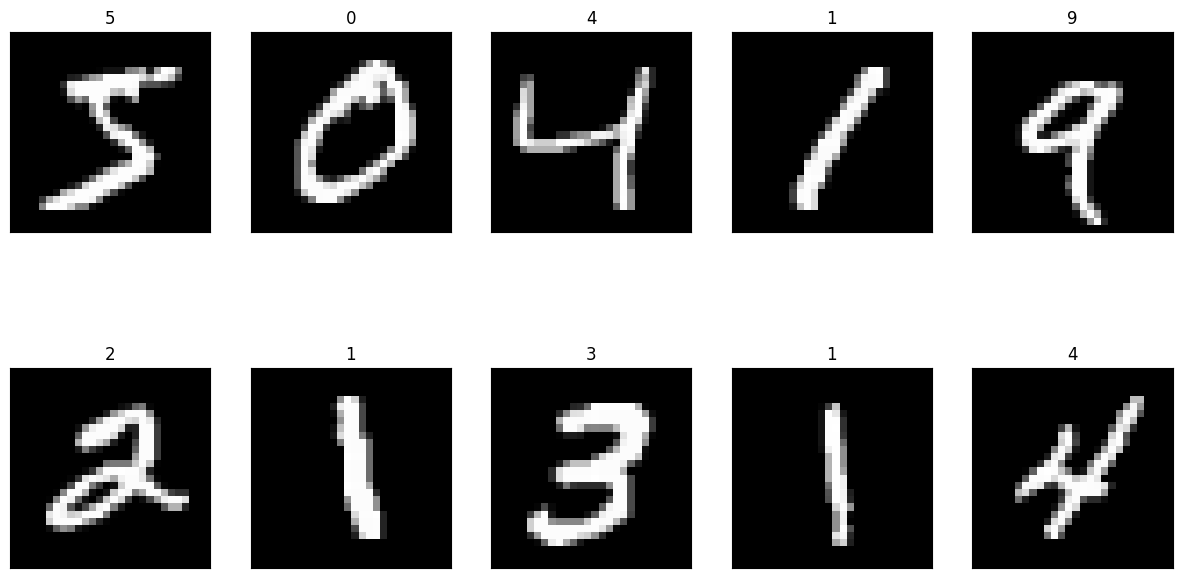

In [6]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(y_train, X_train, axes.ravel()):
    ax.imshow(image.reshape(28, 28), cmap=plt.cm.gist_gray)
    ax.set_title(target)
plt.show()

In [7]:
np.max(X_train[0])

255

### Normalize

In [8]:
# normalize inputs from 0-255 to 0.0-1.0

X_train = X_train/255
X_test = X_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

X_train[0].shape

(28, 28, 1)

In [9]:
np.max(X_train[0])

1.0

# Zad
Przekopiuj architekturę:

https://github.com/kj7kunal/MNIST-Keras/blob/master/src/train_CNN_keras.py

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import History

In [14]:
#!/usr/bin/env python

import numpy as np
from matplotlib import pyplot as plt

from keras import backend as K
# from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D
from keras.layers import Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.models import Model, load_model, model_from_json, model_from_yaml
from keras.utils import to_categorical

batch_sz = 128
n_classes = 10
n_epoch = 12
classes = np.asarray([0,1,2,3,4,5,6,7,8,9],dtype = np.float32)

train_data_orig = np.loadtxt("../dataset/imtrain.csv",delimiter=",",dtype="uint8")
test_data_orig = np.loadtxt("../dataset/imtest.csv",delimiter=",",dtype="uint8")

y_train = train_data_orig[:,0]
Y_train = to_categorical(y_train,10)
X_train = train_data_orig[:,1:]/255.

y_test = test_data_orig[:,0]
Y_test = to_categorical(y_test,10)
X_test = test_data_orig[:,1:]/255.

# print Y_test.shape, X_test.shape, X_test[0]
# print Y_train.shape, X_train.shape

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

# print Y_test.shape, X_test.shape, X_test[0]
# print Y_train.shape, X_train.shape

shapeX = (28,28,1)

def MNIST_Model(input_shape = (28,28,1),classes = 10):
	X_input = Input(input_shape)

	# zero padding probably not required since the main digit is in the centre only
	# X = zeroPadding2D((1,1))(X_input)

	X = Conv2D(32,(3,3),strides = (1,1), name = 'conv0')(X_input)
	X = BatchNormalization(axis=3,name='bn0')(X)
	X = Activation('relu')(X)
	X = Conv2D(32,(3,3),strides = (1,1), name = 'conv1')(X)
	X = BatchNormalization(axis=3,name='bn1')(X)
	X = Activation('relu')(X)
	X = MaxPooling2D((2,2),strides = (2,2),name = 'MP1')(X)

	X = Conv2D(64,(3,3),strides = (1,1), name = 'conv2')(X)
	X = BatchNormalization(axis=3,name='bn2')(X)
	X = Activation('relu')(X)
	X = Conv2D(64,(3,3),strides = (1,1), name = 'conv3')(X)
	X = BatchNormalization(axis=3,name='bn3')(X)
	X = Activation('relu')(X)
	X = MaxPooling2D((2,2),strides = (2,2),name = 'MP2')(X)

	X = Dropout(0.2)(X)
	X = Flatten()(X)
	X = Dense(256,activation = 'relu',name= 'fc1')(X)
	X = Dropout(0.4)(X)
	X = Dense(n_classes,activation = 'softmax',name = 'fco')(X)

	model = Model(inputs = X_input,outputs = X, name = 'MNIST_Model')
	return model


modelMNIST = MNIST_Model(shapeX,n_classes)
print modelMNIST.summary()

modelMNIST.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

modelMNIST.fit(X_train, Y_train, epochs = n_epoch, batch_size = batch_sz)

pred = modelMNIST.evaluate(X_test,Y_test)
print ("Loss = " + str(pred[0]))
print ("Test Accuracy = " + str(pred[1]))

# model_yaml = modelMNIST.to_yaml()
# with open("../saved_models/MNIST_keras_CNN.yaml","w") as yf:
# 	yf.write(model_yaml)
# modelMNIST.save_weights("../saved_models/MNIST_keras_w_CNN.h5")
# yf.close()
# print("Saved to disk.")

# yf = open("../saved_models/MNIST_keras_CNN.yaml","r")
# loaded_model = yf.read()
# yf.close()
# MNIST_loaded_model = model_from_yaml(loaded_model)
# MNIST_loaded_model.load_weights("../saved_models/MNIST_keras_w_CNN.h5")
# print("Loaded model..")

modelMNIST.save("../saved_models/MNIST_keras_CNN.h5")

# del modelMNIST
# MNIST_loaded_model = load_model("../saved_models/MNIST_keras_CNN.h5")

# # MNIST_loaded_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])
# pred = MNIST_loaded_model.evaluate(X_test,Y_test)
# print ("Loss = " + str(pred[0]))
# print ("Test Accuracy = " + str(pred[1]))


NameError: ignored

In [ ]:
plt.plot(history_1.history['accuracy'], label = "tarina Adam")
plt.plot(history_1.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()